In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# import sarimax
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Loading data

In [55]:
df = pd.read_csv('electrecity.csv', index_col='Month', parse_dates=True)
# rename Month column to Date
df.index.names = ['Date']
df.dropna(inplace=True)
df = df.iloc[::-1]
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12300\4100388942.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('electrecity.csv', index_col='Month', parse_dates=True)


,Sales
Date,
2000-12-01,310816.06880
2001-01-01,272334.73804
2001-02-01,269298.40142
2001-03-01,254390.93545
2001-04-01,264490.49166


In [56]:
print(len(df))

276


In [57]:
test = df.iloc[-12:]
train = df.iloc[:-12]

In [58]:
df_comp = test['Sales'].to_frame()

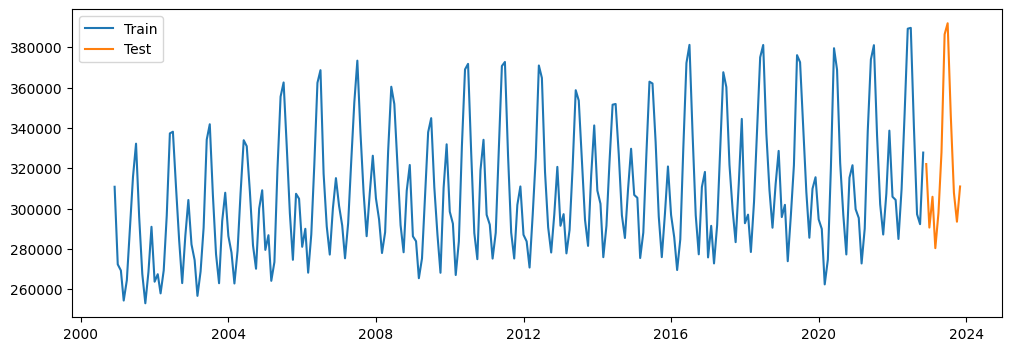

In [59]:
# plot data
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.show()

# Training Holts Winter model

In [60]:
hwes_model = HWES(
    train,
    trend='mul',
    damped_trend=True,
    seasonal='mul',
    seasonal_periods=12
    ).fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
forecast_hwes = hwes_model.forecast(steps=len(test))
df_comp['HWES'] = forecast_hwes

# Training ARIMA model

In [62]:
auto_arima(train, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=5399.811, Time=5.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5386.003, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5406.161, Time=0.56 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5382.922, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5394.282, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=5381.325, Time=0.19 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=5382.945, Time=0.44 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=5384.596, Time=1.06 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=5403.067, Time=0.47 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=5387.314, Time=0.24 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5404.429, Time=0.20 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=5397.161, Time=0.51 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=5386.032, Time=0.18 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 9.958 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  264
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood               -2687.662
Date:                             Fri, 26 Apr 2024   AIC                           5381.325
Time:                                     08:35:52   BIC                           5391.913
Sample:                                 12-01-2000   HQIC                          5385.585
                                      - 11-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1760.6262    635.478      2.771      0.006     515.112    3006.141
ma.L1          0.1356      0.008     16.803      0.000       0.120       0.151
sigma2      8.583e+07      0.000   3.96e+11      0.000    8.58e+07    8.58e+07
===================================================================================
Ljung-Box (L1) (Q):                  52.18   Jarque-Bera (JB):                76.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.56
Prob(H) (two-sided):                  0.60   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.13e+28. Standard errors may be unstable.
"""

In [71]:
# model_sarimax = SARIMAX(train, order=(2,0,1), seasonal_order=(0,1,0,12)) for 24 test size
model_sarimax = SARIMAX(train, order=(0,0,1), seasonal_order=(0,1,0,12))

fit_SARIMAX = model_sarimax.fit()
fit_SARIMAX.summary()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  264
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood               -2691.016
Date:                             Fri, 26 Apr 2024   AIC                           5386.032
Time:                                     08:36:29   BIC                           5393.091
Sample:                                 12-01-2000   HQIC                          5388.872
                                      - 11-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1495      0.008     19.177      0.000       0.134       0.165
sigma2       8.89e+07   1.01e-11    8.8e+18      0.000    8.89e+07    8.89e+07
===================================================================================
Ljung-Box (L1) (Q):                  48.26   Jarque-Bera (JB):               117.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.65
Prob(H) (two-sided):                  0.42   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

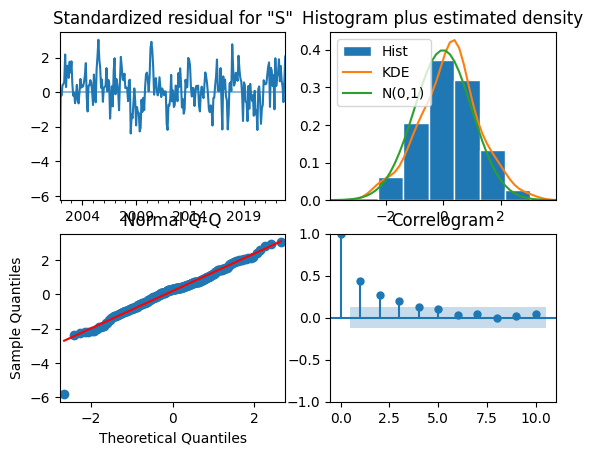

In [72]:
fit_SARIMAX.plot_diagnostics();

In [73]:
start = len(train)
end = len(train) + len(test) -1
prediction_SARIMA = fit_SARIMAX.predict(start, end).rename('SARIMA')

In [74]:
df_comp['SARIMA'] = prediction_SARIMA

# Comparison of both models

<Axes: xlabel='Date'>

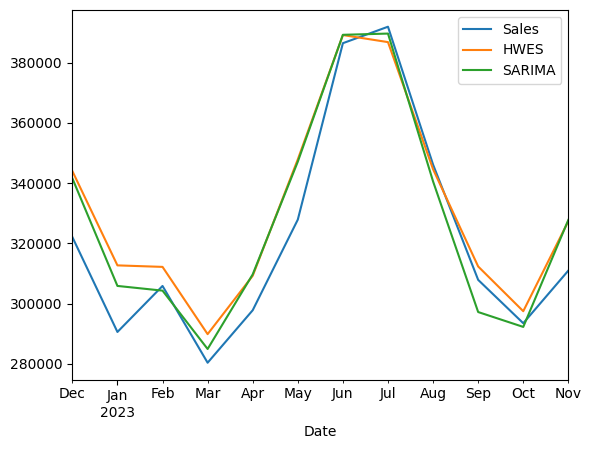

In [75]:
df_comp.plot()

In [76]:
from sklearn.metrics import mean_absolute_percentage_error

In [77]:
mean_absolute_percentage_error(test, forecast_hwes) * 100

3.3605646327514083

In [78]:
mean_absolute_percentage_error(test, prediction_SARIMA) * 100

2.959714308984289